# Description

TODO

- rename this file to be 27-

This file is actually the same as `05-gls-qqplot.ipynb` but in python; pick one of them.

# Modules

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from statsmodels.graphics.gofplots import qqplot_2samples
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import conf

# Settings

In [2]:
INPUT_DIR = conf.RESULTS["GLS_NULL_SIMS"] / "phenoplier" / "gls"
display(INPUT_DIR)

PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls')

# Functions

In [3]:
def show_prop(data, frac=0.05):
    _pvalue_lt_frac = data[data["pvalue"] < frac]
    #     display(_pvalue_lt_frac.head())
    return _pvalue_lt_frac.shape[0] / data.shape[0]

In [39]:
def get_prop(pvalues, frac=0.05):
    _pvalue_lt_frac = pvalues[pvalues < frac]
    #     display(_pvalue_lt_frac.head())
    return _pvalue_lt_frac.shape[0] / pvalues.shape[0]

In [42]:
assert get_prop(np.array([0.20, 0.50]), 0.05) == 0.0
assert get_prop(np.array([0.20, 0.50, 0.75, 0.10, 0.04]), 0.05) == 0.2

In [44]:
assert get_prop(pd.Series(np.array([0.20, 0.50])), 0.05) == 0.0
assert get_prop(pd.Series(np.array([0.20, 0.50, 0.75, 0.10, 0.04])), 0.05) == 0.2

# Get files list

In [4]:
INPUT_FILES = list(INPUT_DIR.glob("*.tsv.gz"))
display(INPUT_FILES[:5])

[PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls/random.pheno5-gls_phenoplier.tsv.gz'),
 PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls/random.pheno74-gls_phenoplier.tsv.gz'),
 PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls/random.pheno18-gls_phenoplier.tsv.gz'),
 PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls/random.pheno75-gls_phenoplier.tsv.gz'),
 PosixPath('/opt/data/results/gls/null_sims/phenoplier/gls/random.pheno86-gls_phenoplier.tsv.gz')]

# Load data

In [24]:
dfs = [
    pd.read_csv(f, sep="\t").assign(phenotype=f.name.split("-")[0]) for f in INPUT_FILES
]

In [25]:
len(dfs)

100

In [26]:
dfs = pd.concat(dfs, axis=0, ignore_index=True)

In [27]:
dfs.shape

(98700, 4)

In [28]:
dfs.head()

,lv,coef,pvalue,phenotype
0,LV1,-0.005557,0.672277,random.pheno5
1,LV10,0.007729,0.270105,random.pheno5
2,LV100,-0.016300,0.911079,random.pheno5
3,LV101,-0.010215,0.787562,random.pheno5
4,LV102,-0.001918,0.559928,random.pheno5


# Summary

In [52]:
summary_list = []
for lv, lv_data in dfs.groupby("lv"):
    assert lv_data.shape[0] == 100

    summary_list.append(
        {
            "lv": lv,
            "1": get_prop(lv_data["pvalue"], 0.01),
            "5": get_prop(lv_data["pvalue"], 0.05),
            "10": get_prop(lv_data["pvalue"], 0.10),
        }
    )

summary_df = pd.DataFrame(summary_list)

In [55]:
summary_df.shape

(987, 4)

In [56]:
summary_df.head()

,lv,1,5,10
0,LV1,0.01,0.06,0.08
1,LV10,0.01,0.05,0.08
2,LV100,0.01,0.02,0.05
3,LV101,0.02,0.04,0.08
4,LV102,0.01,0.04,0.08


In [54]:
summary_df.describe()

,1,5,10
count,987.000000,987.000000,987.000000
mean,0.024063,0.074478,0.124458
std,0.025735,0.038517,0.045235
min,0.000000,0.000000,0.030000
25%,0.010000,0.050000,0.090000
50%,0.020000,0.070000,0.120000
75%,0.030000,0.090000,0.150000
max,0.290000,0.300000,0.320000


In [75]:
summary_df[summary_df["5"] < 0.08]

,lv,1,5,10
0,LV1,0.01,0.06,0.08
1,LV10,0.01,0.05,0.08
2,LV100,0.01,0.02,0.05
3,LV101,0.02,0.04,0.08
4,LV102,0.01,0.04,0.08
...,...,...,...,...
971,LV974,0.00,0.01,0.06
974,LV977,0.01,0.05,0.08
976,LV979,0.02,0.07,0.11
977,LV98,0.02,0.06,0.11


In [57]:
summary_df[summary_df["5"] == 0.30]

,lv,1,5,10
672,LV704,0.29,0.3,0.31


In [58]:
summary_df[summary_df["lv"] == "LV704"]

,lv,1,5,10
672,LV704,0.29,0.3,0.31


In [73]:
dfs[dfs["lv"] == "LV704"].sort_values("pvalue").head(40)

,lv,coef,pvalue,phenotype
66801,LV704,0.072883,8.320958e-27,random.pheno67
48048,LV704,0.047999,6.491753e-13,random.pheno97
32256,LV704,0.048137,8.056385e-13,random.pheno26
37191,LV704,0.045708,1.734580e-11,random.pheno17
28308,LV704,0.041548,5.755643e-10,random.pheno66
63840,LV704,0.040078,1.705062e-09,random.pheno11
24360,LV704,0.040177,1.737876e-09,random.pheno33
54957,LV704,0.038369,7.261518e-09,random.pheno61
83580,LV704,0.032111,1.122246e-06,random.pheno35
2646,LV704,0.031549,1.643747e-06,random.pheno18


In [80]:
summary_df[summary_df["lv"] != "LV704"].quantile(
    [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.50, 0.75, 0.80, 0.85, 0.90, 0.95]
)

,1,5,10
0.01,0.00,0.01,0.04
0.05,0.00,0.03,0.06
0.10,0.00,0.03,0.07
0.15,0.00,0.04,0.08
0.20,0.01,0.04,0.08
0.25,0.01,0.05,0.09
0.50,0.02,0.07,0.12
0.75,0.03,0.09,0.15
0.80,0.04,0.10,0.16
0.85,0.04,0.11,0.17


# Some QQ-plots

In [59]:
results = dfs[dfs["phenotype"] == "random.pheno1"]  # .sample(n=100)

In [60]:
results.shape

(987, 4)

In [61]:
results.head()

,lv,coef,pvalue,phenotype
68103,LV1,0.006813,0.291300,random.pheno1
68104,LV10,0.018938,0.065806,random.pheno1
68105,LV100,0.008387,0.243078,random.pheno1
68106,LV101,-0.006642,0.698914,random.pheno1
68107,LV102,-0.002703,0.584499,random.pheno1


## Proportion pvalue < 0.05

In [62]:
show_prop(results, 0.01)

0.016210739614994935

In [63]:
show_prop(results, 0.05)

0.06180344478216818

In [64]:
show_prop(results, 0.10)

0.10739614994934144

In [65]:
show_prop(results, 0.15)

0.14994934143870314

In [66]:
show_prop(results, 0.20)

0.1945288753799392

## Plot

In [67]:
data = results["pvalue"].to_numpy()
n = data.shape[0]
uniform_data = np.array([i / (n + 1) for i in range(1, n + 1)])

In [68]:
display(data[:5])
display(uniform_data[:5])

array([0.29130029, 0.06580624, 0.24307826, 0.69891352, 0.58449877])

array([0.00101215, 0.00202429, 0.00303644, 0.00404858, 0.00506073])

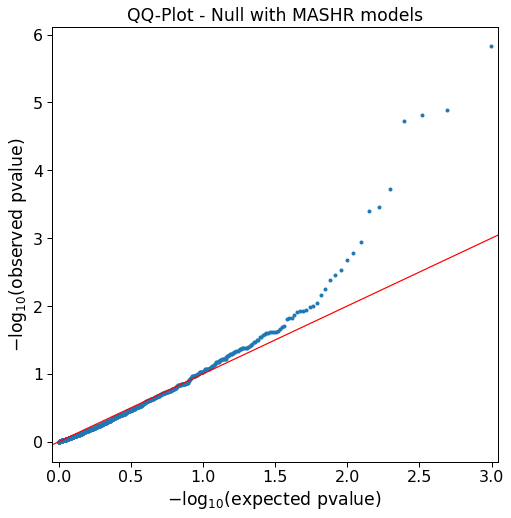

In [69]:
observed_data = -np.log10(data)
expected_data = -np.log10(uniform_data)

with sns.plotting_context("paper", font_scale=1.8), mpl.rc_context(
    {"lines.markersize": 3}
):
    fig, ax = plt.subplots(figsize=(8, 8))

    fig = qqplot_2samples(expected_data, observed_data, line="45", ax=ax)

    ax.set_xlim(expected_data.min() - 0.05, expected_data.max() + 0.05)

    ax.set_xlabel("$-\log_{10}$(expected pvalue)")
    ax.set_ylabel("$-\log_{10}$(observed pvalue)")
    ax.set_title("QQ-Plot - Null with MASHR models")